In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Загрузка данных
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

# Выбор нужных колонок
X = dataset[['Spending Score (1-100)']].values  # Признак: 'Spending Score (1-100)'
y = dataset['Annual Income (k$)'].values  # Целевая переменная: 'Annual Income (k$)'

# Просмотр первых пяти строк
print("Матрица признаков:")
print(X[:5])
print("Целевая переменная:")
print(y[:5])

from sklearn.model_selection import train_test_split

# Разделение данных: 75% на тренировку, 25% на тест
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

from sklearn.linear_model import LinearRegression

# Создание и обучение модели
regressor = LinearRegression()  # Создание объекта линейной регрессии
regressor.fit(X_train, y_train)  # Обучение модели на тренировочных данных

# Коэффициенты модели
print(f"Коэффициент наклона (slope): {regressor.coef_[0]}")
print(f"Свободный член (intercept): {regressor.intercept_}")



Матрица признаков:
[[39]
 [81]
 [ 6]
 [77]
 [40]]
Целевая переменная:
[15 15 16 16 17]
Коэффициент наклона (slope): -0.04203582239668638
Свободный член (intercept): 63.02577352817481


Предсказания на тестовых данных:
[61.80673468 62.47930784 61.0921257  61.26026899 60.12530178]


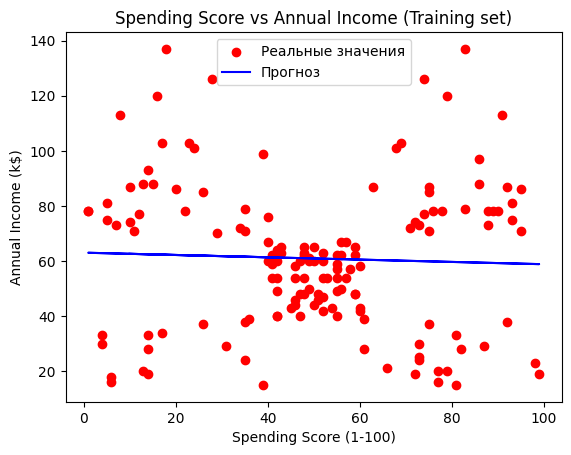

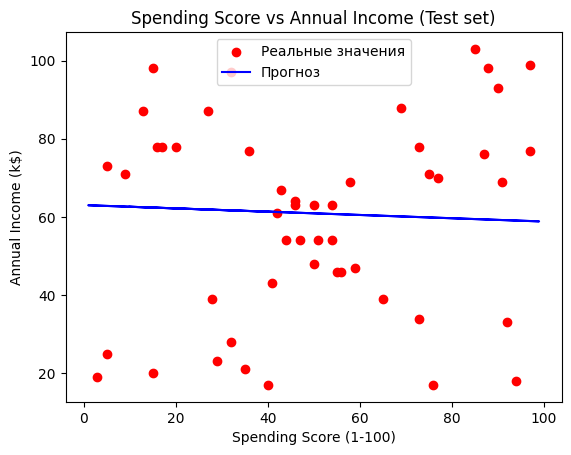

In [2]:
# Предсказание на тестовых данных
y_pred = regressor.predict(X_test)  # Предсказание на основе тестовых данных

# Вывод первых нескольких предсказанных значений
print("Предсказания на тестовых данных:")
print(y_pred[:5])

# Построение диаграммы рассеяния для тренировочного набора
plt.scatter(X_train, y_train, color='red', label='Реальные значения')  # Точки реальных значений тренировочного набора
# Линия прогноза для тренировочного набора
plt.plot(X_train, regressor.predict(X_train), color='blue', label='Прогноз')
plt.title('Spending Score vs Annual Income (Training set)')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()

# Построение диаграммы рассеяния для тестового набора
plt.scatter(X_test, y_test, color='red', label='Реальные значения')  # Точки реальных значений тестового набора
# Линия прогноза, построенная на данных тренировочного набора
plt.plot(X_train, regressor.predict(X_train), color='blue', label='Прогноз')
plt.title('Spending Score vs Annual Income (Test set)')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()
